## 7 Estimating the CDF and Statistical Functionals

#### Topic
1. Nonparametric estimation of CDF
2. Nonparametric estimation of statistical functionals

### 7.1 The Empirical Distribution Function

#### 7.1 Definition
The $\textbf{empirical distribution function}$ $\hat{F}_n$ is a CDF defined as
$$
\hat{F}_n (x) = \frac{\sum_{i=1}^n I(X_i \le x)}{n}
$$

#### 7.3 Theorem
At any fixed value of x,
$$
\begin{eqnarray*}
\mathbb{E}(\hat{F}_n(x))&=&F(x) \\
\mathbb{V}(\hat{F}_n(x))&=&\frac{F(x)(1-F(x))}{n} \\
MSE&=&\frac{F(x)(1-F(x))}{n}\longrightarrow 0 \\
\hat{F}_n(x) &\overset{P}{\longrightarrow}& F(x)
\end{eqnarray*}
$$
PROOF


#### 7.4 Theorem (The Glivenko-Cantelli Theorem)
Let $X_i \sim F$, then
$$
\sup_x \left|\hat{F}_n (x) - F(x) \right| \overset{P}{\longrightarrow} 0
$$
In other words, converges to true distribution almost surely.

#### 7.5 Theorem (The Dvoretzky-Kiefer-Wolfowitz (DKW) inequality)
$$
\mathbb{P}\left( \sup_x \left|F(x)-\hat{F}_n(x)\right| \gt \epsilon \right )\le 2e^{-2n\epsilon^2}
$$

#### A Nonparametric 1-$\alpha$ Confidence Band for F
Let
$$
L(x)=\max \{\hat{F}_n(x)-\epsilon_n,0 \} \\
U(x)=\min \{\hat{F}_n(x)+\epsilon_n,1 \} \\
\epsilon_n=\sqrt{\frac{1}{2n} \log(\frac{2}{\alpha})}
$$
It follows from 7.5 that for any F,
$$
\mathbb{P} \left (L(x)\le F(x) \le U(x)  \right ) \ge 1-\alpha
$$

#### 7.6 Example (Nerve Data)
Cox and Lewis (1966) reported 799 waiting times between successive pulses along a nerve fiber (nerve.dat). The green line is the empirical distribution function, the red ones are its 95% confidence band.

<IPython.core.display.Javascript object>


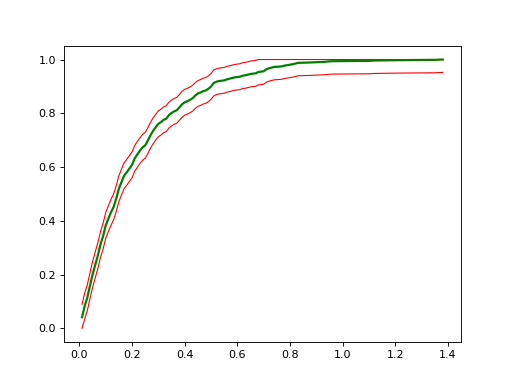

In [104]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt('data/nerve.dat', skip_header=False, delimiter='\t')
data = np.reshape(data,-1)
data = data[~np.isnan(data)]
data = np.sort(data)

unique_data = np.unique(data, return_counts=True)
n, = unique_data[0].shape
total, = data.shape
fhat = unique_data[1]/total

#plot the empirical cdf
cdf = [np.sum(fhat[:i+1]) for i in range(n)]
plt.plot(unique_data[0], cdf, 'g-', linewidth=2)

# plot the left/right bound of the confidence interval
alpha = 0.05
epsilon = np.sqrt(1/(2*total) * np.log(2/alpha))
l_cdf = cdf - epsilon
l_cdf[l_cdf < 0] = 0
plt.plot(unique_data[0], l_cdf, 'r-', linewidth=1)

r_cdf = cdf + epsilon
r_cdf[r_cdf > 1] = 1
plt.plot(unique_data[0], r_cdf, 'r-', linewidth=1)

### 7.2 Statistical Functionals

A statistical functional $T(F)$ is any function of $F$. Examples are:
1. Mean: $\mu=\int xf(x)dx$
2. Variance: $\delta^2=\int(x-\mu)^2f(x)dx$
3. Median: $F^{-1}(\frac{1}{2})$

#### 7.7 Definition
The plug-in estimator of $\theta=T(F)$ is defined by
$$
\hat{\theta}_n=T(\hat{F}_n)
$$
In other words, just plug in $\hat{F}_n$ for the unknown $F$

#### 7.8 Definition
If $T(F)=\int r(x)f(x)dx$ for some function $r(x)$ then $T$ is called a $\textbf{linear functional}$.  
The reason it is called linear functional is because:
$$
T(aF+bG)=aT(F)+bT(G)
$$

What if $r(x)$ is dependent on $F(x)$?

#### 7.9 Theorem
Ther plug-in estimator for linear functional $T(F)=\int r(x)dF(x)$ is:
$$
T(\hat{F}_n)=\int r(x)d{\hat{F}_n(x)} = \frac{1}{n}\sum_{i=1}^n r(X_i)
$$

About how to find out the standard error $\hat{se}$. 
In many cases, it turns out that
$$
T(\hat{F}_n)\approx N(T(F), \hat{se}^2)
$$
An approximate $1-\alpha$ confidence interval for $T(F)$ is then:
$$
T(\hat{F}_n)\pm z_{\alpha/2} \hat{se}
$$

#### 7.10 Example (The mean)
Let $\mu=T(F)=\int xdF(x)$, the plug-in estimator is $\hat{\mu}=\int x d{\hat{F}_n(x)}=\frac{1}{n}\sum_{i=1}^nX_i = \overline{X}_n$.  

The standard error is $se=\sqrt{\mathbb{V}(\overline{X}_n)}=\frac{\delta}{\sqrt{n}}$. If $\hat{delta}$ denotes an estimate of $\delta$, then the estimated standard error is $\frac{\hat{\delta}}{\sqrt{n}}$.  

A Normal-based confidence interval for $\mu$ is
$$
\overline{X}_n \pm z_{\alpha/2} \hat{se}
$$

#### 7.11 Example (The Variance)


#### 7.12 Example (The Skewness)

#### 7.13 Example (Correlation)

#### 7.14 Example (Quantiles)
Let $F$ be strictly increasing with density $f$. For $0 \lt p \lt 1$, the $p^{th}$ quantile is defined by $T(F)=F^{-1}(p)$. The estimate of $T(F)$ is $\hat{F}_n^{-1}(p)$. Since $\hat{F}_n$ is not invertible, to avoid ambiguity we define
$$
\hat{F}_n^{-1}(p)=inf{x:\hat{F}_n(x) \ge p}
$$
We call $T(F)=\hat{F}_n^{-1}(p)$ the $p^{th}$ $\textbf{sample quantile}$.

#### 7.15 Example (Plasma Cholesterol)
Draw the histograms for plasma cholesterol (in mg/dl) for 371 patients with chesk pain (Scott et al. (1978)), the dataset: bloodfat.dat.

<IPython.core.display.Javascript object>


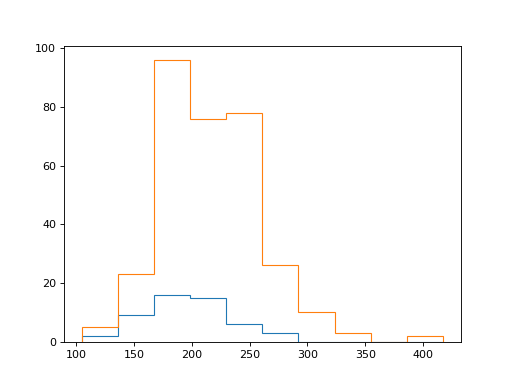

(array([ 5., 23., 96., 76., 78., 26., 10.,  3.,  0.,  2.]),
 array([105. , 136.2, 167.4, 198.6, 229.8, 261. , 292.2, 323.4, 354.6,
        385.8, 417. ]),
 <a list of 1 Patch objects>)

In [129]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

data = np.genfromtxt('data/bloodfat.dat', skip_header=False, delimiter='\t')
data = data[~np.isnan(data)]
data = np.reshape(data, (-1, 2))

# 51 patients with no heart disease, 320 with narrowing of the arteries
# First column is the cholesterol value
x = data[:,0]
x1 = x[:51]
x2 = x[52:]
plt.hist(x1, 10, range=(x.min(), x.max()), histtype='step')
plt.hist(x2, 10, range=(x.min(), x.max()), histtype='step')